# Project: Analysis of WeRateDogs Tweets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#packages">Import of Packages</a></li>
<li><a href="#gather">Gather Data</a></li>
<li><a href="#asses">Asses Data</a></li>
<li><a href="#clean">Clean Data</a></li>
<li><a href="#analysis">Data Analysis</a></li>
<li><a href="#conc">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset used is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10 with a numerator of 10 or greater. WeRateDogs has over 4 million followers and has received international media coverage.

The steps performed are data gathering, wrangling, and cleaning. Based on the cleaned dataset, some analysis are performed. The focus in this project is on gathering data from different sources and providing a cleaned dataset.

Files from three different sources are gathered and later combined:
- **Enhanced Twitter Archive (csv-file // local drive)**
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets. Based on the tweet's text information on rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) have been extracted. This "enhanced" file was provided as a csv file.

- **Tweet Image Prediction (tsv-file // Request library)**
For each image in the WeRateDogs Twitter archive the dog breed was classified using a neural network. The file contains the three most confident predictions for each tweet and is hosted on Udacity's servers. It was downloaded programmatically using the Requests library and a provided URL.

- **Retweet Favorite Count (JSON // Twitter API)**
The Twitter API was queried to get JSON data for each tweet in the WeRateDogs Twitter archive using Python's Tweepy library. Each tweet's entire set of JSON data was stored in a file called tweet_json.txt. Then this .txt file was read line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.

## Import of requiered Packages

In [477]:
import pandas as pd
import numpy as np
import datetime
import requests
import os
import tweepy
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='gather'></a>
## Gather Data

### Tweet Archive

In [478]:
# Read Twitter Archive from provided csv file
archive = pd.read_csv('./Twitter_Files/twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [479]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Tweet Image Prediction

In [480]:
# Download Tweet Image Predictions file from udacity server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save file on local drive
with open (os.path.join('Twitter_Files', url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

# Read file into data frame
image = pd.read_csv('./Twitter_Files/image-predictions.tsv', sep='\t') # set \t as seperator, since it is a .tsv file
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [481]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


### Retweet Favorite Count

In [482]:
'''
Since tweet information is already stored in tweet_json.txt file, do not request data from api again

# Store Twitter authentication details
# https://developer.twitter.com/en/account/get-started --> Apps --> BS_Udacity_Dogs
my_api_key = 'xxxxxxxxxxxxxx'
my_api_secret_key = 'xxxxxxxxxxxxxx'
my_access_token = 'xxxxxxxxxxxxxx'
my_access_token_secret = 'xxxxxxxxxxxxxx'

# Twitter API connection
auth = tweepy.OAuthHandler(my_api_key, my_api_secret_key)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

# Get information from Twitter API for each tweet_id in Twitter Archive file
tweet_ids = archive['tweet_id']
with open('./Twitter_Files/tweet_json.txt', mode = 'w') as tweet_json:
    for tweet_id in tweet_ids:
        try:
            status = api.get_status(tweet_id) #, tweet_mode='extended'
            json_str = json.dumps(status._json) # convert to JSON
            tweet_json.write(json_str + '\n') # write information to tweet_json.txt file
        except:
            # Tweet does not exist anymore 
             continue

'''

"\nSince tweet information is already stored in tweet_json.txt file, do not request data from api again\n\n# Store Twitter authentication details\n# https://developer.twitter.com/en/account/get-started --> Apps --> BS_Udacity_Dogs\nmy_api_key = 'xxxxxxxxxxxxxx'\nmy_api_secret_key = 'xxxxxxxxxxxxxx'\nmy_access_token = 'xxxxxxxxxxxxxx'\nmy_access_token_secret = 'xxxxxxxxxxxxxx'\n\n# Twitter API connection\nauth = tweepy.OAuthHandler(my_api_key, my_api_secret_key)\nauth.set_access_token(my_access_token, my_access_token_secret)\napi = tweepy.API(auth, wait_on_rate_limit = True)\n\n# Get information from Twitter API for each tweet_id in Twitter Archive file\ntweet_ids = archive['tweet_id']\nwith open('./Twitter_Files/tweet_json.txt', mode = 'w') as tweet_json:\n    for tweet_id in tweet_ids:\n        try:\n            status = api.get_status(tweet_id) #, tweet_mode='extended'\n            json_str = json.dumps(status._json) # convert to JSON\n            tweet_json.write(json_str + '\n') # 

In [483]:
# Read data from txt into a list (each line is one entry in list)
tweets_list = []
tweet_json = open('./Twitter_Files/tweet_json.txt', 'r')

for line in tweet_json:
    try:
        tweet = json.loads(line)
        tweets_list.append(tweet)
    except:
         continue
tweet_json.close()

# Extract 'retweet_count' and 'favorite_count' from list and store in dataframe (together with tweet_id)
favoretweet = pd.DataFrame() #create dataframe
favoretweet['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_list))
favoretweet['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_list))
favoretweet['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_list))

favoretweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


<a id='assess'></a>
## Assess Data

### Tweet Archive

In [484]:
# Get a basic idea of columns in table and their values
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1523,690607260360429569,6.903413e+17,467036706.0,2016-01-22 18:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 @LightningHoltt,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126856765440/photo/1,7,10,a,None,None,None,None
403,824297048279236611,NaN,NaN,2017-01-25 16:45:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nala. She got in trouble. One h*ck of a pupnishment. Still 11/10 would pet https://t.co/EmJbG0skLt,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/824297048279236611/photo/1,https://twitter.com/dog_rates/status/824297048279236611/photo/1",11,10,Nala,None,None,None,None
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10,10,Lugan,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None


In [485]:
# Get data types of columns and number of non-null entries
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- Column **tweet_id** has data type integer (string is more suited for an ID)
- There a some columns with null values. However, all columns of interest have 2356 non-null values.
- Colummn **timestamp** should be converted to DateTime object to be better suited for analysis

In [486]:
#Get number of duplicated rows
sum(archive.duplicated())

0

In [487]:
# Check for duplicated values in 'tweet_id'
sum(archive.tweet_id.duplicated())   # could have also been analyzed by archive.tweet_id.nunique()  

0

There are no duplicated rows and only unique tweet_ids in this table.

In [488]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**rating_numerator** is supposed to be around/greater than 10. It ranges between 0 and 1776 and is further analyzed (e.g. for outliers. **rating_denominator** is supposed to be around 10. It ranges between 0 and 170 and is further analyzed (e.g. for outliers.

In [489]:
archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [490]:
archive.query('rating_denominator!=10').count()[0]

23

23 rows out of 2356 have a denominator which is not 10 (less than 1% of all rows). These rows will be deleted to ease later analysis.

In [491]:
#create mask with denominators of 10, sicne all other rows will be removed later anyways
archive_10 = archive.query('rating_denominator==10') 
archive_10['rating_numerator'].value_counts().sort_index()

0       2  
1       8  
2       9  
3       19 
4       15 
5       37 
6       32 
7       54 
8       102
9       156
10      461
11      463
12      558
13      351
14      54 
15      2  
17      1  
26      1  
27      1  
75      2  
182     1  
420     2  
666     1  
1776    1  
Name: rating_numerator, dtype: int64

In [492]:
pd.set_option('display.max_colwidth', -1)
archive_10.query('rating_numerator>17').text

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                           
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                            
290     @markhoppus 182/10                                                                                                                                               
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                     
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back http

After checking some of the tweets with rating higher than 17, it seems that there are few float ratings where the decimal places are stored in column **rating_numerator** (9.75, 11.27 and 11.26). Those rows will be removed. Ratings greater than or equal to 182 are considered as outliers and will be removed as well (this applies to 5 ratings, two relating to Snoop Dogg and one to Atticus (dog of independence) with a rating of 1776).

In [493]:
# Check entries of name column
archive.name.value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Lucy         11 
Oliver       11 
Penny        10 
Lola         10 
Tucker       10 
Winston      9  
Bo           9  
the          8  
Sadie        8  
Daisy        7  
Toby         7  
Bailey       7  
Buddy        7  
an           7  
Stanley      6  
Koda         6  
Scout        6  
Jax          6  
Dave         6  
Leo          6  
Bella        6  
Jack         6  
Milo         6  
Rusty        6  
Oscar        6  
Gus          5  
            ..  
Tove         1  
Glacier      1  
Pip          1  
Zoe          1  
Cilantro     1  
Jennifur     1  
Olaf         1  
Teddy        1  
Socks        1  
Snoop        1  
Lenox        1  
Jeremy       1  
Zooey        1  
Todo         1  
Kanu         1  
Ember        1  
Steve        1  
Laika        1  
Eazy         1  
Obi          1  
Kane         1  
Finnegus     1  
Alexander    1  
Meatball     1  
Zara         1  
Bronte       1  
Edgar        1  
Glenn        1

There are some entries in **name** column which were not parsed correctly, e.g. 'a', 'an', 'such', 'quite'. Since all visibly identified erronous entries start with a lower case letter, this will be used to identify further erronous entries which will then be converted to 'None' in the Cleaning Process.

In [494]:
archive['Name_FirstLetter'] = archive['name'].str[0]
archive['Name_FirstLetter_Lower'] = archive['Name_FirstLetter'].str.islower()
archive_name_lower = archive.query('Name_FirstLetter_Lower==True')
archive_name_lower.name.value_counts()

a               55
the             8 
an              7 
very            5 
quite           4 
one             4 
just            4 
not             2 
mad             2 
actually        2 
getting         2 
this            1 
his             1 
old             1 
infuriating     1 
by              1 
light           1 
officially      1 
my              1 
space           1 
all             1 
life            1 
such            1 
incredibly      1 
unacceptable    1 
Name: name, dtype: int64

In [495]:
archive_name_none = archive_name_lower.name.value_counts().index.tolist()
archive_name_none

['a',
 'the',
 'an',
 'very',
 'quite',
 'one',
 'just',
 'not',
 'mad',
 'actually',
 'getting',
 'this',
 'his',
 'old',
 'infuriating',
 'by',
 'light',
 'officially',
 'my',
 'space',
 'all',
 'life',
 'such',
 'incredibly',
 'unacceptable']

In [496]:
# Check entries for columns **doggo, floofer, pupper, and puppo**
print(archive.pupper.value_counts())
print(archive.doggo.value_counts())
print(archive.puppo.value_counts())
print(archive.floofer.value_counts())
print("------------------------------------------")
print("Pupper: {}".format(archive.pupper.value_counts().loc['pupper']))
print("Doggo: {}".format(archive.doggo.value_counts().loc['doggo']))
print("Puppo: {}".format(archive.puppo.value_counts().loc['puppo']))
print("Floofer: {}".format(archive.floofer.value_counts().loc['floofer']))

None      2099
pupper    257 
Name: pupper, dtype: int64
None     2259
doggo    97  
Name: doggo, dtype: int64
None     2326
puppo    30  
Name: puppo, dtype: int64
None       2346
floofer    10  
Name: floofer, dtype: int64
------------------------------------------
Pupper: 257
Doggo: 97
Puppo: 30
Floofer: 10


Since out of the 2,356 available data records only 394 records have information on the type of dog this information will not be considered in the further analysis. If it were to be considered, one possible cleaning action would be to combine columns **doggo, floofer, pupper, and puppo** into one 'dogtype' column.

### Tweet Image Prediction

In [497]:
# Get a basic idea of columns in table and their values
image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
406,673708611235921920,https://pbs.twimg.com/media/CVl-Z0dWcAAs7wr.jpg,1,golden_retriever,0.936333,True,cocker_spaniel,0.024211,True,Labrador_retriever,0.009435,True
763,688908934925697024,https://pbs.twimg.com/media/CY9_BOYWkAAkuzn.jpg,1,crane,0.158859,False,pier,0.130016,False,bell_cote,0.087741,False
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True
1177,737800304142471168,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,1,malamute,0.374682,True,Norwegian_elkhound,0.334853,True,limousine,0.068173,False


In [498]:
# Get data types of columns and number of non-null entries
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


- Column **tweet_id** has data type integer (string is more suited for an ID)
- The image prediction table has less entries than the Twitter archive table. Only a maximum of 2075 can be matched to 2356 tweets. No null values in this table.

In [499]:
#Get number of duplicated rows
sum(image.duplicated())

0

In [500]:
# Check for duplicated values in 'tweet_id'
sum(image.tweet_id.duplicated())   # could have also been analyzed by archive.tweet_id.nunique()  

0

There are no duplicated rows or tweet ids.

In [501]:
# Check the distribution on which image number corresponds to the most confident prediction
image.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

Most times the first image is the most confident prediction, but also p2, p3, and p4 have the best predictions. However information from p4 column is missing. Instead of deleting those rows from the dataset the images with the average best fit are taken instead (lowest mean px_comf) (which is a bit simpler than identifying the second best fit for each row). 

In [502]:
image_p4 = image.query('img_num==4')
image_p4.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,3.100000e+01,31.0,31.000000,31.000000,31.000000
mean,8.002106e+17,4.0,0.818488,0.058523,0.027473
std,5.388178e+16,0.0,0.189390,0.053816,0.031909
min,6.686232e+17,4.0,0.226716,0.000023,0.000003
25%,7.606596e+17,4.0,0.771316,0.022395,0.007357
50%,8.186145e+17,4.0,0.883991,0.035059,0.017943
75%,8.339563e+17,4.0,0.944413,0.084091,0.029551
max,8.851676e+17,4.0,0.999953,0.204177,0.125745


If img_num is 4, p3 should be used instead (since it has lowest mean p3_conf value)

In [503]:
image.p2.value_counts().sort_index()

Afghan_hound                      5 
African_hunting_dog               1 
Airedale                          7 
American_Staffordshire_terrier    21
American_alligator                2 
American_black_bear               3 
Angora                            4 
Appenzeller                       3 
Arabian_camel                     4 
Arctic_fox                        4 
Australian_terrier                2 
Bedlington_terrier                5 
Bernese_mountain_dog              1 
Blenheim_spaniel                  4 
Border_collie                     12
Border_terrier                    4 
Boston_bull                       19
Brabancon_griffon                 10
Brittany_spaniel                  8 
Cardigan                          73
Chesapeake_Bay_retriever          41
Chihuahua                         44
Christmas_stocking                3 
Dandie_Dinmont                    4 
Doberman                          6 
English_foxhound                  2 
English_setter                    7 
E

When checking entries for p1, p2, and p3 it seems that real dog breeds are start with upper case letters whereas non dog breeds are start with lower case letters. This might be helpful later.

### Favorite/Retweet Count

In [504]:
# Get a basic idea of columns in table and their values
favoretweet.sample(5)

,tweet_id,favorite_count,retweet_count
237,845397057150107648,7897,1899
2163,668986018524233728,558,172
1507,690374419777196032,3406,909
1934,673636718965334016,1122,370
1583,685943807276412928,1694,635


In [505]:
# Get data types of columns and number of non-null entries
favoretweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


- Column **tweet_id** has data type integer (string is more suited for an ID)
- The favorite/retweet table has less entries than the Twitter archive table (some tweets might already have been deleted). Only a maximum of 2334 can be matched to 2356 tweets. No null values in this table.

In [506]:
#Get number of duplicated rows
sum(favoretweet.duplicated())

0

In [507]:
favoretweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.334000e+03,2334.000000,2334.000000
mean,7.420377e+17,7883.542845,2904.165381
std,6.815496e+16,12239.167992,4904.200484
min,6.660209e+17,0.000000,0.000000
25%,6.783361e+17,1366.500000,583.000000
50%,7.185770e+17,3439.500000,1355.500000
75%,7.986802e+17,9676.000000,3382.750000
max,8.918152e+17,163368.000000,83074.000000


No suspicious values (e.g. negative values) in this table. All vounts for favorite and retweet seem to be reasonable.

### Quality Issues
**Twitter Archive**
- Column **tweet_id** is not of type String
- Column **timestamp** is not of type DateTime object
- Some values in column **rating_denominator** are not 10 (23 rows)
- Ratings higher or equal to 26 are either dur to wrong formatting or are outlier ratings in column **rating_numerator** (9 rows)
- Erronous entries in **name** column (stored in array archive_name_none)
- Not all columns are relevant for later analysis

**Tweet Image Prediction**
- Column **tweet_id** is not of type String
- Some dog breeds might be stored with a lower case first letter
- Column names are not informative
- Not all columns are relevant for later analysis

**Tweet Retweet Count**
- Column **tweet_id** is not of type String

#### Tidiness Issues

- Most confident prediction for dog (and breed) is stored in multiple columns (**Tweet Image Prediction** columns **p1, p2, p3, p4**); for img_num is 4, p3 should be used instead.
- One single dataframe is created by merging the three dataframes.

<a id='clean'></a>
## Clean Data

In [508]:
# Make copies of data frames
archive_clean = archive.copy()
image_clean = image.copy()
favoretweet_clean = favoretweet.copy()

### Twitter Archive

#### Define
- Convert column **tweet_id** to String
- Convert column **timestamp** to type DateTime object

#### Code

In [509]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [510]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
Name_FirstLetter       

Conversion to String and DateTime object successful.

#### Define
- Drop rows where **rating_denominator** is not 10 (23 rows)

#### Code

In [511]:
archive_clean = archive_clean[archive_clean.rating_denominator==10]

#### Test

In [512]:
archive_clean.shape[0]

2333

In [513]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2333 non-null object
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2333 non-null datetime64[ns]
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2278 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          2333 non-null object
doggo                         2333 non-null object
floofer                       2333 non-null object
pupper                        2333 non-null object
puppo                         2333 non-null object
Name_FirstLetter       

Rows were deleted successfully (size before dropping was 2356, thus, 23 rows were dropped)

#### Define
- Keep only those rows where **rating_numerator** is lower than 26. Higher ratings are considered as wrong formatting or outliers (9 rows)

#### Code

In [514]:
archive_clean = archive_clean.query('rating_numerator<26')

#### Test

In [515]:
archive_clean.shape[0]

2324

Rows were deleted successfully (size before dropping was 2333, thus, 9 rows were dropped)

#### Define
- Create new column **dog_stage** for columns **doggo, floofer, pupper, and puppo**
note: melt function cannot be used since not all rows have defined dog stage and thus 'None' values cannot be removed afterwards (since those rows would then be removed as well)

#### Define
- Replcae erronous entries in **name** column with 'None' (stored in array archive_name_none)

#### Code

In [516]:
archive_clean.name.replace(archive_name_none, "None", inplace = True)

#### Test

In [517]:
print("{} 'None' in archive // {} 'None' in archive_clean".format(archive.name.value_counts().loc['None'], archive_clean.name.value_counts().loc['None']))

745 'None' in archive // 829 'None' in archive_clean


In [518]:
archive_name_lower.shape[0]

109

Count of "None" values for name was increased by 109, which is the number of entries in archive_name_lower (before 745, now 854)

### Tweet Image Prediction

#### Define
- Convert column **tweet_id** to String

#### Code

In [519]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

#### Test

In [520]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.0+ KB


#### Define
- Rename existing columns **px_dog** to 'isdog', **px** to'dogbreed', and **px_conf** to 'p_value' to store most confident prediction for dog and dog breed
- For img_num=1 use **p1**, for img_num=2 use **p2**, for img_num=3 use **p3**, and for img_num=4 use **p3**
- Capitalize dog breeds, since sometimes valid dog breeds are stored with lower case

#### Code

In [521]:
# Use p1_dog and p1 for img_num=1
image_clean_1 = image_clean
image_clean_1 = image_clean_1[image_clean_1.img_num==1]
image_clean_1 = image_clean_1.rename(columns = {'p1_dog':'isdog', 'p1':'dogbreed', 'p1_conf':'p_value'})

# Use p2_dog and p2 for img_num=2
image_clean_2 = image_clean
image_clean_2 = image_clean_2[image_clean_2.img_num==2]
image_clean_2 = image_clean_2.rename(columns = {'p2_dog':'isdog', 'p2':'dogbreed', 'p2_conf':'p_value'})

# Use p3_dog and p3 for img_num=3
image_clean_3 = image_clean
image_clean_3 = image_clean_3[image_clean_3.img_num==3]
image_clean_3 = image_clean_3.rename(columns = {'p3_dog':'isdog', 'p3':'dogbreed', 'p3_conf':'p_value'})

# Use p3_dog and p3 for img_num=4
image_clean_4 = image_clean
image_clean_4 = image_clean_4[image_clean_4.img_num==4]
image_clean_4 = image_clean_4.rename(columns = {'p3_dog':'isdog', 'p3':'dogbreed', 'p3_conf':'p_value'})

In [522]:
# Keept only columns 'tweetid, 'isdog', 'dogbreed', and 'p_value'
clean_1 = image_clean_1[['tweet_id','isdog','dogbreed','p_value']]
clean_2 = image_clean_2[['tweet_id','isdog','dogbreed','p_value']]
clean_3 = image_clean_3[['tweet_id','isdog','dogbreed','p_value']]
clean_4 = image_clean_4[['tweet_id','isdog','dogbreed','p_value']]

In [523]:
# Append data frames to one data frame
clean_1_2 = clean_1.append(clean_2, ignore_index=True)
clean_1_2_3 = clean_1_2.append(clean_3, ignore_index=True)
image_clean = clean_1_2_3.append(clean_4, ignore_index=True)

In [524]:
image_clean.dogbreed = image_clean.dogbreed.str.capitalize()

#### Test

In [525]:
image.shape[0]

2075

In [526]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id    2075 non-null object
isdog       2075 non-null bool
dogbreed    2075 non-null object
p_value     2075 non-null float64
dtypes: bool(1), float64(1), object(2)
memory usage: 50.7+ KB


In [527]:
image_clean.dogbreed.value_counts()

Golden_retriever             123
Labrador_retriever           109
Pembroke                     80 
Chihuahua                    76 
Pug                          53 
Chow                         39 
Samoyed                      39 
Pomeranian                   38 
Toy_poodle                   37 
Cocker_spaniel               31 
Malamute                     30 
French_bulldog               27 
Eskimo_dog                   26 
Chesapeake_bay_retriever     23 
Kuvasz                       22 
Shetland_sheepdog            21 
Cardigan                     21 
Staffordshire_bullterrier    21 
Siberian_husky               21 
Seat_belt                    21 
Beagle                       19 
Italian_greyhound            19 
Pekinese                     19 
Miniature_pinscher           18 
Web_site                     16 
Rottweiler                   16 
Kelpie                       16 
Lakeland_terrier             16 
German_shepherd              16 
Teddy                        15 
          

The original data frame and the cleaned data frame have the same shape and the entries in column **dogbreed** are capitalized.

### Favorite/Retweet Count

#### Define
- Convert column **tweet_id** to String

#### Code

In [528]:
favoretweet_clean['tweet_id'] = favoretweet_clean['tweet_id'].astype(str)

#### Test

In [529]:
favoretweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null object
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### Merge Dataframes

#### Define
- Merge all tables into one table (since three tables are merged, this is done in two steps); use 'inner-join' so each tweet_id has all information of interest

#### Code

In [530]:
tweet_merged = pd.merge(archive_clean, image_clean, on=['tweet_id'], how='inner') # step1: merge archive and image
tweet_merged = pd.merge(tweet_merged, favoretweet_clean, on=['tweet_id'], how='inner') # step1: merge master and favorite/retweet

#### Test

In [531]:
tweet_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2037
Data columns (total 24 columns):
tweet_id                      2038 non-null object
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2038 non-null datetime64[ns]
source                        2038 non-null object
text                          2038 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2038 non-null object
rating_numerator              2038 non-null int64
rating_denominator            2038 non-null int64
name                          2038 non-null object
doggo                         2038 non-null object
floofer                       2038 non-null object
pupper                        2038 non-null object
puppo                         2038 non-null object
Name_FirstLetter          

Tables have been merged; complete set of information available for 2038 tweets.

### Reduce Dataframe to columns of interest
#### Define
- Keep only those columns that could be of interest for the analysis
- note: **rating_denominator** can be dropped, since its value is always 10
#### Code

In [532]:
tweet_master = tweet_merged[['tweet_id','timestamp','source','rating_numerator','name','isdog','dogbreed','p_value',
                             'favorite_count','retweet_count', 'expanded_urls']]
tweet_master = tweet_master.copy() #create dataframe from slice
# Store master as csv file
tweet_master.to_csv('twitter_archive_master.csv', index=False)

#### Test

In [533]:
tweet_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2037
Data columns (total 11 columns):
tweet_id            2038 non-null object
timestamp           2038 non-null datetime64[ns]
source              2038 non-null object
rating_numerator    2038 non-null int64
name                2038 non-null object
isdog               2038 non-null bool
dogbreed            2038 non-null object
p_value             2038 non-null float64
favorite_count      2038 non-null int64
retweet_count       2038 non-null int64
expanded_urls       2038 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 177.1+ KB


Merging all three tables into one was successful.

<a id='analysis'></a>
## Data Analysis

In [534]:
tweet_master.name.value_counts().nlargest(10)

None       658
Cooper     10 
Penny      10 
Lucy       10 
Tucker     10 
Charlie    10 
Oliver     10 
Winston    8  
Sadie      8  
Lola       8  
Name: name, dtype: int64

Cooper, Penny, Lucy, Tucker, Charlie and Oliver are the most popular names for dogs (though 658 tweets have no name associated)

In [535]:
dog_breeds = tweet_master.query("isdog==True")
dog_breeds_count = dog_breeds.dogbreed.value_counts()
breed_top10 = dog_breeds_count.nlargest(10)
breed_top10

Golden_retriever      121
Labrador_retriever    105
Pembroke              79 
Chihuahua             73 
Pug                   53 
Chow                  39 
Pomeranian            37 
Toy_poodle            37 
Samoyed               37 
Cocker_spaniel        31 
Name: dogbreed, dtype: int64

Golden Retriever and Labrador Retriever are the dog breeds with the highest number of single tweets.

In [536]:
print("There are {} different dog breeds in the dataset".format(dog_breeds_count.shape[0]))

There are 112 different dog breeds in the dataset


In [537]:
breed_top10 = tweet_master.groupby(['dogbreed'])['favorite_count', 'retweet_count'].agg(['count', 'mean']).reset_index()
breed_top10.sort_values(by = [('favorite_count', 'count')], ascending=False).head(10)

dogbreed favorite_count               retweet_count  \
                                 count          mean         count   
134  Golden_retriever    121            10404.892562  121            
186  Labrador_retriever  105            11910.609524  105            
248  Pembroke            79             11177.063291  79             
76   Chihuahua           73             7030.150685   73             
262  Pug                 53             5159.622642   53             
79   Chow                39             7150.717949   39             
277  Samoyed             37             12397.432432  37             
256  Pomeranian          37             7107.972973   37             
340  Toy_poodle          37             5925.432432   37             
83   Cocker_spaniel      31             10805.677419  31             

                  
            mean  
134  3568.528926  
186  4312.466667  
248  3019.177215  
76   2400.671233  
262  1795.886792  
79   2307.615385  
277  4518.675676  
256  2359.108108  
340  2287.648649  
83   3923.032258

The dogs with the most tweets do not have the largest number of average favorite counts and average retweet counts. 

In [538]:
fav_breed = tweet_master.groupby(['dogbreed'])['favorite_count','p_value'].agg(['count', 'mean']).reset_index()
fav_breed.sort_values(by = ('favorite_count', 'mean'), ascending=False).head(10)

dogbreed favorite_count          p_value          
                          count     mean   count      mean
161  House_finch  1              79875.0  1       0.209852
190  Laptop       1              64846.0  1       0.153718
10   Angora       2              45382.0  2       0.571526
196  Limousine    1              45204.0  1       0.130432
334  Tiger_cat    1              44997.0  1       0.006679
126  Fountain     1              43637.0  1       0.997509
63   Bubble       2              39209.5  2       0.618865
221  Mongoose     1              37245.0  1       0.228298
270  Revolver     1              33993.0  1       0.190292
25   Basketball   1              33802.0  1       0.808396

In [539]:
retweet_breed = tweet_master.groupby(['dogbreed'])['retweet_count','p_value'].agg(['count', 'mean']).reset_index()
retweet_breed.sort_values(by = ('retweet_count', 'mean'), ascending=False).head(10)

dogbreed retweet_count          p_value          
                         count     mean   count      mean
161  House_finch  1             37967.0  1       0.209852
349  Umbrella     2             20524.0  2       0.007850
334  Tiger_cat    1             18721.0  1       0.006679
350  Upright      2             17887.0  2       0.303415
63   Bubble       2             16337.5  2       0.618865
135  Gondola      2             15681.5  2       0.226571
10   Angora       2             15415.0  2       0.571526
221  Mongoose     1             15297.0  1       0.228298
190  Laptop       1             14364.0  1       0.153718
270  Revolver     1             13778.0  1       0.190292

In [540]:
tweet_master.query('dogbreed=="Bubble"')

,tweet_id,timestamp,source,rating_numerator,name,isdog,dogbreed,p_value,favorite_count,retweet_count,expanded_urls
1425,680221482581123072,2015-12-25 03:00:14,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",10,CeCe,False,Bubble,0.240173,1514,306,https://twitter.com/dog_rates/status/680221482581123072/photo/1
1528,676219687039057920,2015-12-14 01:58:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",10,Kenneth,False,Bubble,0.997556,76905,32369,https://twitter.com/dog_rates/status/676219687039057920/photo/1


Golden Retriever and Labrador Retriever are the dog breeds with the highest number of tweets, they are not the dog breeds with the most favorite counts or retweets on average. In the top ten list of favorite counts and retweet counts are "dog breeds" with only a single tweet or only two tweets and surprisingly many non-dogs (e.g. House Finch, Bubble, Umbrella). On average, non-dogs have a very high p-value associated so they actually might be real dogs. When checking "Bubble" both pictures showed dogs. So the prediction model might need more training.

In [541]:
tweet_master_dog = tweet_master.query('isdog==True')
tweet_master_dog = tweet_master_dog.query('p_value<=0.05')
fav_breed_dog = tweet_master_dog.groupby(['dogbreed'])['favorite_count','p_value'].agg(['count', 'mean']).reset_index()
fav_breed_dog.sort_values(by = ('favorite_count', 'mean'), ascending=False).head(10)

dogbreed favorite_count          p_value          
                             count     mean   count      mean
5   Bluetick         1              32475.0  1       0.021762
38  Maltese_dog      1              30035.0  1       0.008945
34  Leonberg         1              28954.0  1       0.017943
48  Saint_bernard    1              28321.0  1       0.010728
41  Newfoundland     1              23525.0  1       0.000405
49  Saluki           1              23029.0  1       0.036325
56  Tibetan_mastiff  2              22766.5  2       0.034593
37  Malinois         1              22020.0  1       0.000153
45  Pekinese         2              21589.5  2       0.008939
10  Briard           1              19875.0  1       0.020041

In [542]:
tweet_master_dog = tweet_master.query('isdog==True')
tweet_master_dog = tweet_master_dog.query('p_value<=0.05')
fav_breed_dog = tweet_master_dog.groupby(['dogbreed'])['retweet_count','p_value'].agg(['count', 'mean']).reset_index()
fav_breed_dog.sort_values(by = ('retweet_count', 'mean'), ascending=False).head(10)

dogbreed retweet_count          p_value          
                            count     mean   count      mean
38  Maltese_dog      1             15822.0  1       0.008945
50  Schipperke       2             8694.0   2       0.045519
37  Malinois         1             7838.0   1       0.000153
5   Bluetick         1             7706.0   1       0.021762
34  Leonberg         1             6988.0   1       0.017943
48  Saint_bernard    1             6945.0   1       0.010728
45  Pekinese         2             6489.5   2       0.008939
49  Saluki           1             6020.0   1       0.036325
29  Keeshond         1             5974.0   1       0.011019
56  Tibetan_mastiff  2             5571.0   2       0.034593

When limiting to tweets with 'certainly' identified dogg breeds (p-value lower or equal to 0.05), the result looks still very similar to above, i.e. in the top ten list of favorite counts and retweet counts are dog breeds with only a single tweet or only two tweets.

In [543]:
tweet_master.rating_numerator.describe()

count    2038.000000
mean     10.588813  
std      2.174677   
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      15.000000  
Name: rating_numerator, dtype: float64

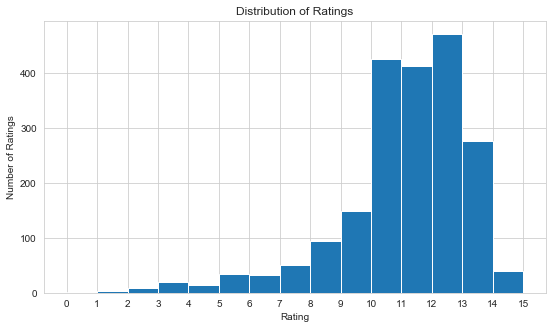

In [544]:
plt.figure(figsize=(9, 5))
bin_edges = np.arange(tweet_master.rating_numerator.min(),tweet_master.rating_numerator.max()+1,1)
plt.hist(data=tweet_master, x='rating_numerator', bins=bin_edges)
xticks=[0, 1, 2,3,4,5,6,7,8,9,10,11,12, 13, 14,15]
plt.xticks(xticks)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings');

In [545]:
print("{} out of {} ratings are 9 or lower.".format(tweet_master.query('rating_numerator<10').shape[0],tweet_master.shape[0]))
print("{} out of {} ratings are 15 or higher.".format(tweet_master.query('rating_numerator>14').shape[0],tweet_master.shape[0]))

411 out of 2038 ratings are 9 or lower.
1 out of 2038 ratings are 15 or higher.


The distrbution of ratings show that most tweets get a rating between 11 and 14. However, 20% of all ratings are 9 or lower.

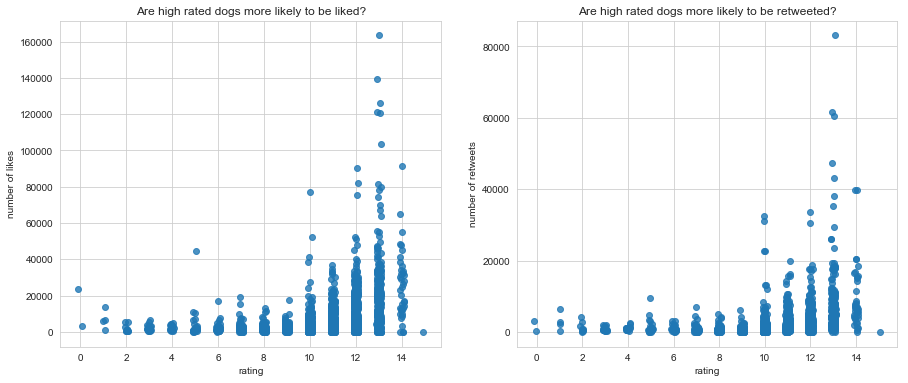

In [546]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.regplot(data=tweet_master, x='rating_numerator', y='favorite_count', x_jitter=0.1, fit_reg=False)
plt.title('Are high rated dogs more likely to be liked?')
plt.xlabel('rating')
plt.ylabel('number of likes')
plt.subplot(1,2,2)
sns.regplot(data=tweet_master, x='rating_numerator', y='retweet_count', x_jitter=0.1, fit_reg=False)
plt.title('Are high rated dogs more likely to be retweeted?')
plt.xlabel('rating')
plt.ylabel('number of retweets');

Dogs with a high rating are more likely to be liked or retweeted. Some exceptions are visible in the Scatter Plot, e.g. dog with rating of 5 is favorited more than 40,000 times.

In [547]:
tweet_master.timestamp.describe()

count     2038               
unique    2038               
top       2016-08-04 22:52:29
freq      1                  
first     2015-11-15 22:32:08
last      2017-07-31 00:18:03
Name: timestamp, dtype: object

In [548]:
tweets_per_month = tweet_master.groupby(pd.Grouper(key = 'timestamp', freq = "M"))['tweet_id'].count().reset_index()
tweets_per_month.head(2)

,timestamp,tweet_id
0,2015-11-30,296
1,2015-12-31,362


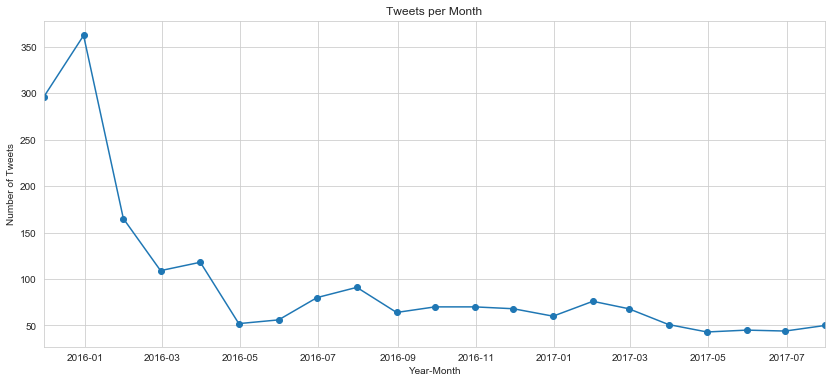

In [549]:
plt.figure(figsize=(14, 6))
plt.plot(tweets_per_month.timestamp, tweets_per_month.tweet_id, 'o-')
plt.title('Tweets per Month');
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 31)]) 
plt.xlabel('Year-Month')
plt.ylabel('Number of Tweets');

The number of tweets per month dramatically decreases from January 2016 to March 2016 (from more than 350 tweets/month to only a little over 100 tweets/month), after reaching a peak of 362 tweets/month in January 2016. Until August 2017 the number of tweets per month settle down to around 50.

In [550]:
retweets_favs_per_month = tweet_master.groupby(pd.Grouper(key = 'timestamp', freq = "M"))['retweet_count', 'favorite_count'].sum().reset_index()
retweets_favs_per_month.head(2)

,timestamp,retweet_count,favorite_count
0,2015-11-30,145429,340186
1,2015-12-31,517658,1233953


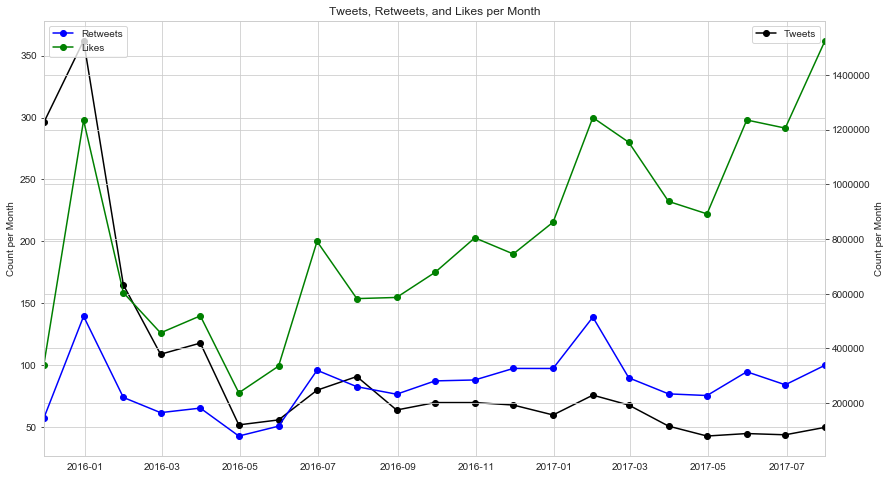

In [551]:
fig, ax = plt.subplots(figsize=(14, 8))

# First axis
plt.plot(tweets_per_month.timestamp, tweets_per_month.tweet_id, 'o-k', label='Tweets')
plt.ylabel('Count per Month')
plt.legend();

# Second axis
ax2 = ax.twinx()
plt.plot(retweets_favs_per_month.timestamp, retweets_favs_per_month.retweet_count, 'o-b', label='Retweets')
plt.plot(retweets_favs_per_month.timestamp,retweets_favs_per_month.favorite_count, 'o-g', label='Likes')

plt.title('Tweets, Retweets, and Likes per Month');
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 31)]) 
plt.xlabel('Year-Month')
plt.ylabel('Count per Month')
plt.legend();

Even though the number of tweets per month are declining, the number of retweets and especially the number of favorites are increasing, i.e. with a less a number of tweets similar retweets and favorites are achived.

<a id='conc'></a>
## Conclusions

**Findings**<br>
- Cooper, Penny, Lucy, Tucker, Charlie and Oliver are the most popular names for dogs.
- The distrbution of ratings show that most dogs get a rating between 11 and 14. However, 20% of all ratings are 9 or lower and only one rating is higher than 14.
- Golden Retriever and Labrador Retriver are the dog breed with the highest number of tweets. But they are not the dog breeds with the most favorite counts or retweets on average. In the top ten list of favorite counts and retweet counts are dog breeds with only a single tweet or only two tweets. In total, 112 different dog breeds are present in the dataset.
- Dogs with a high rating are more likely to be liked or retweeted.
- Even though the number of tweets per month is declining, the number of retweets and especially the number likes are increasing, i.e. with a less a number of tweets similar (or even more) retweets and likes are achieved.

**Limitations**<br>
The analysis conducted in this assignment are only preliminary analysis. In order to come to conclusions of statistically significance more sophisticated analysis such as hypothesis testing need to be performed. Also, more data records with would be necessary.